
<center><font color=blue> <h1> Battle of the Neighborhoods, Klang Valley, SBK Metro Stations </h1></font></center>

<center>( This is the capstone project for the Coursera course 'Data Science Professional Certificate' )</center>

<img src = "https://image.shutterstock.com/image-photo/mass-rapid-transit-mrt-train-600w-572178439.jpg" width=1200>

<center>(image from https://www.shutterstock.com/image-photo/malaysia-mrt-mass-rapid-transit-train-546715099)</center>


<font color=blue> <h3>Table of Contents</h3>
</font>

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Introduction](#introduction)<br>
2. [Data](#data)<br>
3. [Methodology](#methodology) <br>
4. [Webscraping](#webscraping) <br>
5. [Creating pandas dataframe and cleaning data](#datacleaning) <br>
6. [EDA - Visualization Analysis](#eda) <br>
7. [Map of SBK Metro Stations Neighborhoods](#map) <br>
8. [Exploring Venues](#exploringvenues) <br>
9. [Normalizing Data](#dataprep) <br>
10. [Clustering & Segmenting](#clustering) <br>
11. [Analysis](#analysis) <br>
12. [Discussion](#discussion) <br>
13. [Conclusion](#conclusion) <br>
14. [Miscellaneous](#misc) <br>



<font color=blue> <h3>Introduction<a id="introduction"></h3> 
</font>
    
Kuala Lumpur is one of the largest metropolitan cities in South East Asia and by far the largest city in Malaysia. Being the 
economic and financial hub of Malaysia, it continually attracts young professionals to the city seeking opportunities and 
enhancements in their careers. The Kuala Lumpur city area has a population of nearly 2 million while the Greater Kuala Lumpur area, often called the Klang Valley, has a population of more than 7 million residents.  

For young professionals starting their careers and relocating in Kuala Lumpur, selecting a residential neighourhood can be 
daunting. More likely than not, downtown Kuala Lumpur will be unaffordable for young professionals unless on an expatriate compensation package. Residential locations outside downtown Kuala Lumpur provide options that allows a decent, balanced and affordable work-play lifestyle.

Selecting residential locations in the proximity of Metro (MRT) stations along the SBK (Sg. Buloh – Kajang) line should be 
given consideration; the SBK line runs from Kajang in the South East of the Klang Valley, traverses across the heart of Kuala Lumpur City Center (KLCC), and continues to Sg. Buloh in the North West of Klang Valley. Neighborhoods in the vicinity of these Metro Stations offer several advantages; easy access around Kuala Lumpur and the Klang Valley, avoidance of long hours in traffic congestion, cost savings in car ownership and parking fees being a few reasons. 



<font color=blue> <h3> </h3> </font>
The information from this exercize could be of interest to new homeseekers in Klang Valley area. It also shows how interested 
prospective home seekers can further retrieve additional specific information in the vicinity of any of the SBK Metro Station 
based on their lifestyle preferences.


<font color=blue> <h3>Data<a id="data"></h3> 
</font>

Information and map of the MRT route and train stations are obtained from Wikipedia, "https://en.wikipedia.org/wiki/Kajang_line" and "https://en.wikipedia.org/wiki/Kajang_line#/map/0". 

Some of the location coordinates shown in the website are incorrect. Geopy Geocoder Nominatim was used. Coordinates from two stations from Nominatim were also incorrect. For these two cases, the coordinates were obtained from Google Maps.

All the information used in this exercize are publicly available.

<font color=blue> <h3>Methodology<a id="methodology"></h3>
</font> 
1. BeautifulSoup is used to scrape data from the wikipedia on the SBK Metro, also known as the Kajang Line. 
2. The extracted data was cleaned and used to create a pandas df all the station names, their station codes and their geographical  coordinates.
3. A basic exploratory data analysis of the dataframe and a visualization analaysis was performed. 
    - Incorrect Metro station coordinates parsed from the website were noticed and corrected.
    - The final Metro station neighborhood coordinates were determined and the 1 km radius neighborhoods were mapped.
    - Several of the station neighborhoods overlapped. 
    - Hence only alternate Metro station neighborhoods of 1 km radii were used for the analysis.
4. Foursquare was used to explore he venue categories and count for the station neighborhoods.
5. The venue categories count were then normalized for all the stations considered in the analysis.
7. The station neighborhoods were then clustered and segmented according to the venue categories.
8. The clusters were analyzed based on the category venue counts.
9. Further categories were drilled down for understanding of the clusters.
10. The exercize was concluded.

#### Import the following libraries.
(Folium and Nomatim from Geopy Geocoders will be imported later)



In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import json
from pandas.io.json import json_normalize 
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as color
from sklearn.cluster import KMeans

print("Libraries imported")


Libraries imported


<font color=blue><h3> Webscraping <a id="webscraping"></h3>
</font> 

Beautiful Soup is used to scrap information from the links mentioned above in the Data section above.



In [2]:
#request wiki page
wiki_url = 'https://en.wikipedia.org/wiki/Kajang_line'
a = requests.get(wiki_url).text

# create a soup object to parsing
soup = BeautifulSoup(a, 'lxml')

In [3]:
# right click on relevant table on website and click 'inspect'
# noticed that relevant table contents is located at (table class = "wikitable sortable jquery-tablesorter")

my_table = soup.find('table',{'class':'wikitable sortable'})

# extract station information in each row from'tr'.

stns = my_table.find_all ('tr')


In [4]:
#create empty list
list_stns = []
    
#extract "td" tags from each "tr" tags that contains stn code, name and geo data.
#covert to strings
#use regEx to remove html tags
#append cleaned text to 'list_stns'

for row in stns:
    cells = row.find_all('td')
    str_cells =str(cells)  
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    print(clean2)
    list_stns.append(clean2)

print(list_stns)

[Station Code
, Station name
, Opened
, Position
, Feeder bus
, Former working name
, Interchanges
]
[ SBK01 , Sungai Buloh, 16 December 2016, 3°12′22″N 101°34′49″E﻿ / ﻿3.20611°N 101.58028°E﻿ / 3.20611; 101.58028
, 5 lines (T100, T101, T102, T103, T105)
, Sungai Buloh, Northern terminus.
Interchange station, without paid area integration to  KA08  KTM Port Klang Line and  ETS  KTM ETS.
The station will be part of the MRT Putrajaya Line once it starts operation.

]
[ SBK02 , Kampung Selamat, 3°11′50.53″N 101°34′42.33″E﻿ / ﻿3.1973694°N 101.5784250°E﻿ / 3.1973694; 101.5784250, 1 line (T104)
, Kampung Baru Sungai Buloh, The station will be part of the MRT Putrajaya Line once it starts operation.
]
[ SBK03 , RRI, -, -
, -
, -
, Provisional station[25]
]
[ SBK04 , Kwasa Damansara, 16 December 2016, 3°10′35.3″N 101°34′21.2″E﻿ / ﻿3.176472°N 101.572556°E﻿ / 3.176472; 101.572556, -
, Kota Damansara, Future cross-platform interchange with  SSP01  MRT Putrajaya Line
]
[ SBK05 , Kwasa Sentral, 3°10

In [5]:
#check length of 'list_stns'.
#len of 36 is correct - includes header for table and 35 stations. 
len(list_stns)

36

<font color=blue><h3>Creating pandas dataframe and cleaning data <a id="datacleaning"></h3>
</font> 

From the data scraped (list_stns), a pandas dataframe is created and then cleaned to contain only the relevant data.





In [6]:

#Create a pandas dataframe using 'list_stns'
df_sbk1 = pd.DataFrame(list_stns)
df_sbk1.head()



,0
0,"[Station Code\n, Station name\n, Opened\n, Pos..."
1,"[ SBK01 , Sungai Buloh, 16 December 2016, 3°12..."
2,"[ SBK02 , Kampung Selamat, 3°11′50.53″N 101°34..."
3,"[ SBK03 , RRI, -, -\n, -\n, -\n, Provisional s..."
4,"[ SBK04 , Kwasa Damansara, 16 December 2016, 3..."


In [7]:
# There is only one column. This column '0' is split with ","
df_sbk1 = df_sbk1[0].str.split(',', expand=True)
df_sbk1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Station Code\n,Station name\n,Opened\n,Position\n,Feeder bus\n,Former working name\n,Interchanges\n],None,None,None,None,None,None,None
1,[ SBK01,Sungai Buloh,16 December 2016,3°12′22″N 101°34′49″E﻿ / ﻿3.20611°N 101.58028...,5 lines (T100,T101,T102,T103,T105)\n,Sungai Buloh,Northern terminus.\nInterchange station,without paid area integration to KA08 KTM P...,None,None
2,[ SBK02,Kampung Selamat,3°11′50.53″N 101°34′42.33″E﻿ / ﻿3.1973694°N 1...,1 line (T104)\n,Kampung Baru Sungai Buloh,The station will be part of the MRT Putrajaya...,None,None,None,None,None,None,None,None
3,[ SBK03,RRI,-,-\n,-\n,-\n,Provisional station[25]\n],None,None,None,None,None,None,None
4,[ SBK04,Kwasa Damansara,16 December 2016,3°10′35.3″N 101°34′21.2″E﻿ / ﻿3.176472°N 101....,-\n,Kota Damansara,Future cross-platform interchange with SSP01...,None,None,None,None,None,None,None


#### The next few steps are to tidy the database to contain three columns ie Stn Code, Stn Name and Coords. 

In [8]:
# create df with columns showing StnCode and StnName
df_SBK1 = df_sbk1[[0,1]]
df_SBK1 = df_SBK1.drop([0],axis=0)

In [9]:
#df_SBK1 = df_SBK1.rename(columns=({0:'StnCode', 1:'StnName'}))df_SBK1.head()
df_SBK1 = df_SBK1.rename(columns=({0:'Stn_Code', 1:'Stn_Name'}))
df_SBK1.head()

,Stn_Code,Stn_Name
1,[ SBK01,Sungai Buloh
2,[ SBK02,Kampung Selamat
3,[ SBK03,RRI
4,[ SBK04,Kwasa Damansara
5,[ SBK05,Kwasa Sentral


In [10]:
#split column'2' from df_sbk1.
df_sbk1a=df_sbk1[2].str.split('/', expand=True)
df_sbk1a.head()

,0,1,2
0,Opened\n,None,None
1,16 December 2016,None,None
2,3°11′50.53″N 101°34′42.33″E﻿,﻿3.1973694°N 101.5784250°E﻿,3.1973694; 101.5784250
3,-,None,None
4,16 December 2016,None,None


In [11]:
#select column '2' from df_sbk1a, ie geo data in decimal format and rename it 'Coords'. 
#select only coordinates in decimal format, all other information is dropped.
df_sbk1aa = df_sbk1a.drop([0,1], axis=1)
df_sbk1aa.rename(columns={2:'Coords'}, inplace=True)
df_sbk1ab = df_sbk1aa[df_sbk1aa['Coords'].str.match(r'\s*\d{1,2}.\d{1,2}')== True]
df_sbk1ab


,Coords
2,3.1973694; 101.5784250
5,3.1699139; 101.5647944
8,3.1496278; 101.5935917
9,3.1551722; 101.6087944
10,3.1466444; 101.6187472
11,3.1360889; 101.6307667
12,3.1292861; 101.6428917
15,3.1511250; 101.6654861
17,3.14250; 101.69528
18,3.1419694; 101.7020500


In [12]:
#split column'3' from df_sbk1.
df_sbk1b=df_sbk1[3].str.split('/', expand=True)
df_sbk1b

,0,1,2
0,Position\n,None,None
1,3°12′22″N 101°34′49″E﻿,﻿3.20611°N 101.58028°E﻿,3.20611; 101.58028\n
2,1 line (T104)\n,None,None
3,-\n,None,None
4,3°10′35.3″N 101°34′21.2″E﻿,﻿3.176472°N 101.572556°E﻿,3.176472; 101.572556
5,5 lines (T772,None,None
6,3°9′40.26″N 101°34′5.5″E﻿,﻿3.1611833°N 101.568194°E﻿,3.1611833; 101.568194
7,3°9′1.087″N 101°34′43.02″E﻿,﻿3.15030194°N 101.5786167°E﻿,3.15030194; 101.5786167
8,2 lines (T807,None,None
9,2 lines (T809,None,None


In [13]:
#select column '2' from df_sbk1b, ie geo data in decimal format and rename it 'Coords'. 
#select only coordinates in decimal format, all other information is dropped.
df_sbk1ba = df_sbk1b.drop([0,1], axis=1)
df_sbk1ba.rename(columns={2:'Coords'}, inplace=True)
df_sbk1bb = df_sbk1ba[df_sbk1ba['Coords'].str.match(r'\s*\d{1,2}.\d{1,2}')== True]
df_sbk1bb


,Coords
1,3.20611; 101.58028\n
4,3.176472; 101.572556
6,3.1611833; 101.568194
7,3.15030194; 101.5786167
13,3.1339861; 101.6513500
14,3.1434111; 101.6622417
16,3.1373167; 101.6873361
33,3.000750; 101.7840806


In [14]:
#Append df_sbk1bb to df_sbk1ab.
#This gives the coordinates for the 35 stations..
df_sbk2 = df_sbk1ab.append(df_sbk1bb)
df_sbk3 = df_sbk2.sort_index()
df_sbk3

,Coords
1,3.20611; 101.58028\n
2,3.1973694; 101.5784250
4,3.176472; 101.572556
5,3.1699139; 101.5647944
6,3.1611833; 101.568194
7,3.15030194; 101.5786167
8,3.1496278; 101.5935917
9,3.1551722; 101.6087944
10,3.1466444; 101.6187472
11,3.1360889; 101.6307667


In [15]:
# The cordinates are then merged with the station codes and station names, ie df_sbk3 is merged with df_SBK1.
df_SBK5a = df_SBK1.merge(df_sbk3, left_index=True, right_index=True)
df_SBK5a.head()

,Stn_Code,Stn_Name,Coords
1,[ SBK01,Sungai Buloh,3.20611; 101.58028\n
2,[ SBK02,Kampung Selamat,3.1973694; 101.5784250
4,[ SBK04,Kwasa Damansara,3.176472; 101.572556
5,[ SBK05,Kwasa Sentral,3.1699139; 101.5647944
6,[ SBK05A,Teknologi,3.1611833; 101.568194


In [16]:
#The df containing the station codes, station names and coordinates is further cleaned.

df_SBK5b = df_SBK5a.copy()
df_SBK5b['Stn_Code'] = df_SBK5b['Stn_Code'].str.replace(r'[',' ')
df_SBK5b['Stn_Code'] = df_SBK5b['Stn_Code'].str.replace(r'\n',' ')
df_SBK5b['Coords'] = df_SBK5b['Coords'].str.replace(r'\n',' ')
df_SBK5b['Coords'] = df_SBK5b['Coords'].str.replace(r';',',')
df_SBK5b

,Stn_Code,Stn_Name,Coords
1,SBK01,Sungai Buloh,"3.20611, 101.58028"
2,SBK02,Kampung Selamat,"3.1973694, 101.5784250"
4,SBK04,Kwasa Damansara,"3.176472, 101.572556"
5,SBK05,Kwasa Sentral,"3.1699139, 101.5647944"
6,SBK05A,Teknologi,"3.1611833, 101.568194"
7,SBK06,Kota Damansara,"3.15030194, 101.5786167"
8,SBK07,Surian,"3.1496278, 101.5935917"
9,SBK08,Mutiara Damansara,"3.1551722, 101.6087944"
10,SBK09,Bandar Utama,"3.1466444, 101.6187472"
11,SBK10,Taman Tun Dr Ismail (TTDI),"3.1360889, 101.6307667"


### df_SBK6 shows the details of the 33 stations along the SBK Line.

In [17]:
df_SBK6 = df_SBK5b.copy()
df_SBK6.reset_index(inplace=True)
df_SBK6 = df_SBK6.drop(['index'], axis=1)
df_SBK6.head(3)

,Stn_Code,Stn_Name,Coords
0,SBK01,Sungai Buloh,"3.20611, 101.58028"
1,SBK02,Kampung Selamat,"3.1973694, 101.5784250"
2,SBK04,Kwasa Damansara,"3.176472, 101.572556"


In [18]:
df_SBK6.tail(3)

,Stn_Code,Stn_Name,Coords
30,SBK33,Sungai Jernih,"3.000750, 101.7840806"
31,SBK34,Stadium Kajang,"2.994000, 101.786250"
32,SBK35,Kajang,"2.98278, 101.79028"


<font color=blue><h3>EDA - Visualization Analysis<a id="eda"></h3>
</font> 


An initial Folium map with the SBK Metro stations showed only 26 stations instead of 33 stations. A quick check on the len() of the 'Coords' column in df_SBK5b revealed only 26 unique coordinates. df_SBK5a.duplicated() showed that Coords of  SBK24, SBK 25, SBK26, SBK28, SBK29, SBK30 and SBK30 are duplicates. A quick visual check indicated that the Coords of SBK21 were used for all the seven stations mentioned above.

The coordinates of the 8 stations with duplicated coordinates were then obtained from geopy.geocoders

In [19]:
from geopy.geocoders import Nominatim

#### Coordinates were obtained for the following stations from geopy.geocoders, Nominatim



SBK21 MRT Cochrane,

SBK24 MRT Taman Midah

SBK25 Taman Mutiara

SBK26 Taman Connaught

SBK28 Sri Raya

SBK29 Bandar Tun Hussein Onn

SBK30, Batu 11 Cheras

SBK31, Bukit Dukong



#### However, coordinates for  some of the stations from Geopy were incorrect when observed on a Folium map, as the line zigzagged sharply.  Hence these coordinates were sourced manually from Google Map. The correct coodinates were then inputted into the dataframe, as shown below.

In [20]:
#Entered correct coordinates as follows. Latitutudes for MRT 29 and 30 did not seem correct or "moving south along the line".
# so coords were obtained from Google Maps.

df_SBK6.iat[19,2] = '3.1333114,101.7226684'

df_SBK6.iat[22,2] = '3.104665,101.731852'

df_SBK6.iat[23,2] = '3.091215,101.740439'

df_SBK6.iat[24,2] = '3.077590,101.745905'

df_SBK6.iat[26,2] = '3.062527,101.772835'

df_SBK6.iat[27,2] = '3.048451,101.775011'

df_SBK6.iat[28,2] = '3.043231,101.773114'

df_SBK6.iat[29,2] = '3.026552,101.771077'

#### The above information in df_SBK6 was used to visualize the 1 km radius neighborhoods of the SBK Metro stations.  However, due to the proximity of the stations, several of the neighborhoods overlapped.

#### To avoid the overlapping situation, only alternate Metro stations were selected for this analysis. The seventeen selected Metro stations are listed in df_SBK9 below. 

#### The map of the 1km radius neighborhoods for these seventeen selected stations show little overlap in the Folium map below.



In [21]:
df_SBK7 = df_SBK6.copy()
df_SBK7.drop(index = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31], inplace = True)
df_SBK7.reset_index(inplace=True)
#df_SBK7.index = df_SBK7.index+1
df_SBK7 = df_SBK7.drop(['index'], axis=1)
df_SBK7


,Stn_Code,Stn_Name,Coords
0,SBK01,Sungai Buloh,"3.20611, 101.58028"
1,SBK04,Kwasa Damansara,"3.176472, 101.572556"
2,SBK05A,Teknologi,"3.1611833, 101.568194"
3,SBK07,Surian,"3.1496278, 101.5935917"
4,SBK09,Bandar Utama,"3.1466444, 101.6187472"
5,SBK12,Phileo Damansara,"3.1292861, 101.6428917"
6,SBK13,Pavilion Damansara Heights–Pusat Bandar Daman...,"3.1434111, 101.6622417"
7,SBK15,Muzium Negara,"3.1373167, 101.6873361"
8,SBK17,Merdeka,"3.1419694, 101.7020500"
9,SBK20,Tun Razak Exchange,"3.1424028, 101.7201556"


df_SBK7 above shows the Metro Stations considered in this exercise and their Station Codes, Station Names and Coordinates.It is later renamed as df_SBK9 and used for mapping in Folium.



In [22]:
df_SBK7.dtypes

Stn_Code    object
Stn_Name    object
Coords      object
dtype: object

In [23]:
df_SBK9 = df_SBK7

#This is the dataframe used to plot Folium Map.......added
df_SBK9.dtypes
df_SBK9.to_csv('df_SBK9.csv')

### df_SBK9 below is the information used for mapping the neigborhoods along the SBK line.

In [24]:
df_SBK9 = pd.read_csv('df_SBK9.csv', index_col=0)
df_SBK9

,Stn_Code,Stn_Name,Coords
0,SBK01,Sungai Buloh,"3.20611, 101.58028"
1,SBK04,Kwasa Damansara,"3.176472, 101.572556"
2,SBK05A,Teknologi,"3.1611833, 101.568194"
3,SBK07,Surian,"3.1496278, 101.5935917"
4,SBK09,Bandar Utama,"3.1466444, 101.6187472"
5,SBK12,Phileo Damansara,"3.1292861, 101.6428917"
6,SBK13,Pavilion Damansara Heights–Pusat Bandar Daman...,"3.1434111, 101.6622417"
7,SBK15,Muzium Negara,"3.1373167, 101.6873361"
8,SBK17,Merdeka,"3.1419694, 101.7020500"
9,SBK20,Tun Razak Exchange,"3.1424028, 101.7201556"


<font color=blue><h3>Map of SBK Metro Stations Neighborhoods<a id="map"></h3>
</font>

Folium is used to create a map of the Klang Valley with the SBK Metro Stations Neighbourhoods. The neighborhoods considered are within a 1 km radius of each Metro Station. The neighborhoods are at scale and show litte overlapping.

In [25]:
!pip install folium

import folium
print('Folium imported')

     |████████████████████████████████| 102kB 5.1MB/s ta 0:00:011
Folium imported


In [26]:

address = 'Kuala Lumpur, Malaysia'
geolocator = Nominatim(user_agent="my_kl")
location = geolocator.geocode(address)
KL_latitude = location.latitude
KL_longitude = location.longitude
print('The geograpical coordinate of KL City are {}, {}.'.format(KL_latitude, KL_longitude))


The geograpical coordinate of KL City are 3.1516964, 101.6942371.


In [27]:
map_kl = folium.Map(location=[3.1516964,101.6942371], zoom_start=10)
for code, name, coordinates in zip(df_SBK9['Stn_Code'], df_SBK9['Stn_Name'], df_SBK9['Coords']):
    ll = [float(x) for x in coordinates.split(',')]
    folium.Circle(
        ll,popup=name, radius=1000, color='#0078BE'
        ).add_to(map_kl)
map_kl


<font color=blue><h3>Exploring Venues<a id="exploringvenues"></h3>
</font>

Foursquare API is used to explore the neighborhoods around stations shown in df_SBK9.


In [28]:
# The code was removed by Watson Studio for sharing.

In [29]:
# create a database showing Category Names and Category ID; obtained from foursquare developer website or from the json file above..
#https://developer.foursquare.com/docs/api-reference/venues/categories/

CatID = ({'Category_Name':['Arts & Entertainment','College & University','Event','Food','Nightlife Spot',
        'Outdoors & Recreation','Professional & Other Places','Residence','Shop & Service','Travel & Transport'],
        'CategoryID':['4d4b7104d754a06370d81259','4d4b7105d754a06372d81259','4d4b7105d754a06373d81259','4d4b7105d754a06374d81259','4d4b7105d754a06376d81259','4d4b7105d754a06377d81259',
         '4d4b7105d754a06375d81259','4e67e38e036454776db1fb3a','4d4b7105d754a06378d81259','4d4b7105d754a06379d81259']})

df_CatID = pd.DataFrame(CatID)
df_CatID


,Category_Name,CategoryID
0,Arts & Entertainment,4d4b7104d754a06370d81259
1,College & University,4d4b7105d754a06372d81259
2,Event,4d4b7105d754a06373d81259
3,Food,4d4b7105d754a06374d81259
4,Nightlife Spot,4d4b7105d754a06376d81259
5,Outdoors & Recreation,4d4b7105d754a06377d81259
6,Professional & Other Places,4d4b7105d754a06375d81259
7,Residence,4e67e38e036454776db1fb3a
8,Shop & Service,4d4b7105d754a06378d81259
9,Travel & Transport,4d4b7105d754a06379d81259


In [30]:
# create a CategoryID list
CatID_list = df_CatID.values.tolist()
print(CatID_list)

[['Arts & Entertainment', '4d4b7104d754a06370d81259'], ['College & University', '4d4b7105d754a06372d81259'], ['Event', '4d4b7105d754a06373d81259'], ['Food', '4d4b7105d754a06374d81259'], ['Nightlife Spot', '4d4b7105d754a06376d81259'], ['Outdoors & Recreation', '4d4b7105d754a06377d81259'], ['Professional & Other Places', '4d4b7105d754a06375d81259'], ['Residence', '4e67e38e036454776db1fb3a'], ['Shop & Service', '4d4b7105d754a06378d81259'], ['Travel & Transport', '4d4b7105d754a06379d81259']]


In [31]:
# Quick check if CAtID list is correct

CatID_list[0][0],CatID_list[3][1],CatID_list[9][0]

# all correct!!

('Arts & Entertainment', '4d4b7105d754a06374d81259', 'Travel & Transport')

In [32]:
#create a function to explore venues per CatergoryID from Foursquare API
radius=1000
def venues_count(ll, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                ll,
                radius,
                categoryId)

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']


In [33]:
# create dataframe to store data. 


df_SBK_Stns = df_SBK9.copy()
for c in CatID_list:
    df_SBK_Stns[c[0]] = 0
      
df_SBK_Stns


,Stn_Code,Stn_Name,Coords,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,SBK01,Sungai Buloh,"3.20611, 101.58028",0,0,0,0,0,0,0,0,0,0
1,SBK04,Kwasa Damansara,"3.176472, 101.572556",0,0,0,0,0,0,0,0,0,0
2,SBK05A,Teknologi,"3.1611833, 101.568194",0,0,0,0,0,0,0,0,0,0
3,SBK07,Surian,"3.1496278, 101.5935917",0,0,0,0,0,0,0,0,0,0
4,SBK09,Bandar Utama,"3.1466444, 101.6187472",0,0,0,0,0,0,0,0,0,0
5,SBK12,Phileo Damansara,"3.1292861, 101.6428917",0,0,0,0,0,0,0,0,0,0
6,SBK13,Pavilion Damansara Heights–Pusat Bandar Daman...,"3.1434111, 101.6622417",0,0,0,0,0,0,0,0,0,0
7,SBK15,Muzium Negara,"3.1373167, 101.6873361",0,0,0,0,0,0,0,0,0,0
8,SBK17,Merdeka,"3.1419694, 101.7020500",0,0,0,0,0,0,0,0,0,0
9,SBK20,Tun Razak Exchange,"3.1424028, 101.7201556",0,0,0,0,0,0,0,0,0,0


In [34]:

for i, row in df_SBK_Stns.iterrows():
    print(i)
    for c in CatID_list:        
        df_SBK_Stns.loc[i, c[0]] = venues_count(df_SBK_Stns.Coords.iloc[i], radius=1000, categoryId=c[1])
  
    df_SBK_Stns.to_csv('df_SBK_Stns.csv')




0
1
2
3
4
5
6


KeyError: 'totalResults'

### The value count for the different Category IDs is shown below.

In [ ]:
df_SBK_Stns = pd.read_csv('df_SBK_Stns.csv', index_col=0)
df_SBK_Stns


In [ ]:
#Plot venues count per Category ID on box plots
import seaborn as sns
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = df_SBK_Stns)
ax.set_ylabel('Venues_count', fontsize=20)
ax.set_xlabel('Venue_category', fontsize=20)
ax.tick_params(labelsize=13)
plt.xticks(rotation=30, ha='right')

plt.show()

<font color=blue><h3>Normalizing Data<a id="dataprep"></h3>
</font>

The data shown in the box plot is normalised using MinMaxScaler from SciKit, to enable meaningful interpretation.

In [ ]:
from sklearn.preprocessing import MinMaxScaler



In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = df_SBK_Stns.values[:,4:]
SBK_Stns_venues_dataset = MinMaxScaler().fit_transform(X)

### Normalised dataframe

In [ ]:
df_SBK_Stns_normalized = pd.DataFrame(SBK_Stns_venues_dataset)

df_SBK_Stns_normalized.columns = df_SBK_Stns.columns[4:]
df_SBK_Stns_normalized



In [ ]:
#Normalised data is box plotted.
#plt.xticks(rotation='vertical')
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = df_SBK_Stns_normalized)
ax.set_ylabel('Count of venues (normalized)', fontsize=20)
ax.set_xlabel('Venue category', fontsize=20)
ax.tick_params(labelsize=14)
plt.xticks(rotation=30, ha='right')

plt.show()

<font color=blue><h3>Clustering and Segmenting<a id="clustering"></h3>
</font>

In [ ]:
#for each value of k, use inertia to calculate the sum of squared distances of samples to the nearest cluster centre

# use k-elbow method to select optimal k

sum_of_squared_distances = []
K = range(1,10)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

In [ ]:
# plot sum of squard distances vs number of clusters
plt.plot(K, sum_of_squared_distances, '*-')
plt.xlabel('k-clusters')
plt.ylabel('sum_of_squared_distances')
plt.title('k - elbow method')
plt.show()

#### From the plot above, optimal number of cluster (k) is 3.


#### The clustered stations are shown below.

In [ ]:
# cluster the stations
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=10).fit(df_SBK_Stns_normalized)
kmeans_labels = kmeans.labels_
kmeans_labels

In [ ]:
# include cluster labels into normalized stn dataframe
df_SBK_clusters = df_SBK_Stns.copy()
df_SBK_clusters['Cluster'] = kmeans_labels
df_SBK_clusters_normalized = df_SBK_Stns_normalized.copy()
df_SBK_clusters_normalized['Cluster'] = kmeans_labels
df_SBK_clusters_normalized['Stn_Name'] = df_SBK_Stns['Stn_Name']
df_SBK_clusters_normalized['Stn_Code'] = df_SBK_Stns['Stn_Code']
df_SBK_clusters_normalized['Coords'] = df_SBK_Stns['Coords']



In [ ]:
df_SBK_clusters_normalized.head(10)


In [ ]:
df_SBK_clusters_normalized.columns

In [ ]:
df_SBK_clusters_normalized = df_SBK_clusters_normalized[['Cluster', 'Stn_Name',
       'Stn_Code','Coords','College & University', 'Event', 'Food', 'Nightlife Spot',
       'Outdoors & Recreation', 'Professional & Other Places', 'Residence',
       'Shop & Service', 'Travel & Transport']]
df_SBK_clusters_normalized.head(10)

In [ ]:
# Groupby stations by clusters
df_SBK_clusters_normalized.groupby(['Cluster'])['Stn_Name'].count()

In [ ]:

df_SBK_clusters_normalized.sort_values(['Cluster','Stn_Code'])


In [ ]:
# Visualize categoryID venue counts by clusters
fig, axes = plt.subplots(1,kclusters, figsize=(20, 10))
axes[0].set_ylabel('Count of venues (normalized)', fontsize=20)
for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.2)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=18)
    axes[k].tick_params(labelsize=15)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = df_SBK_clusters_normalized[df_SBK_clusters_normalized['Cluster'] == k].drop('Cluster',1), ax=axes[k])
plt.show()

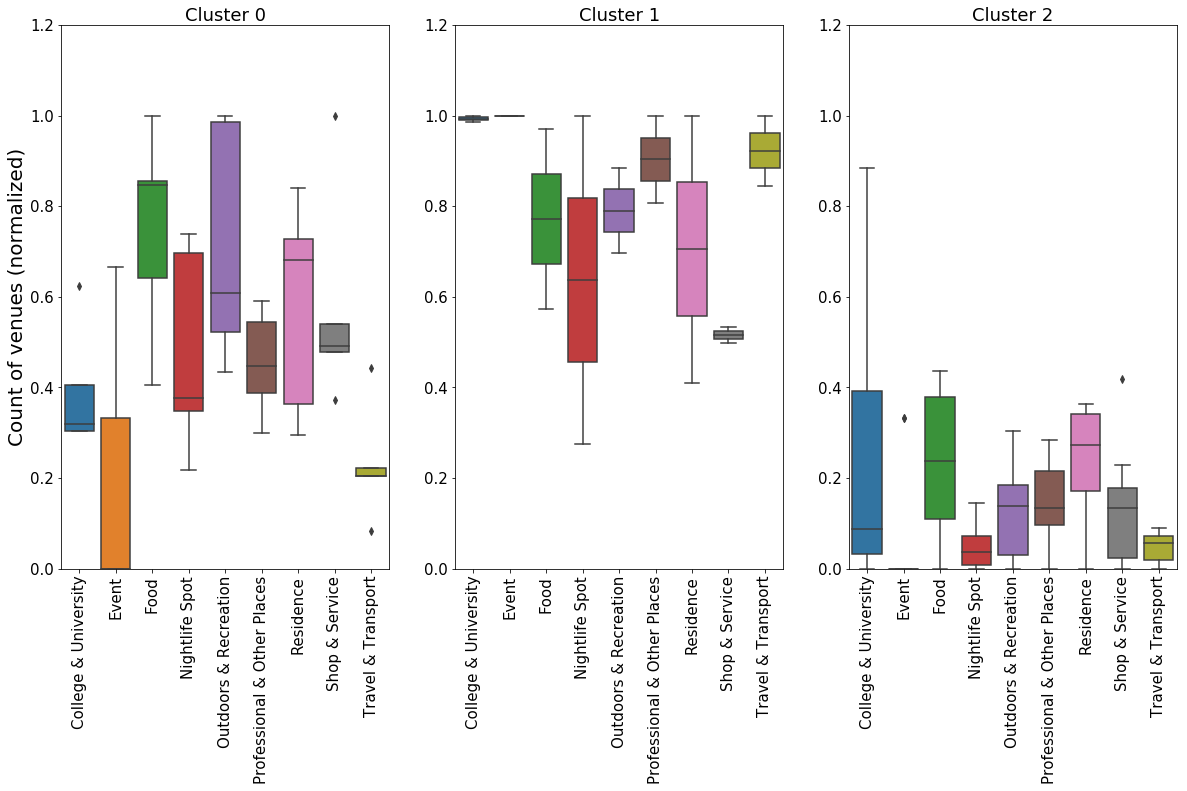

#### Map of clustered SBK Metro Station Neighborhoods

In [ ]:
SBK_Metro_Stns_cluster_map= folium.Map(location=[3.1516964,101.6942371], zoom_start=10)
for i,cluster, station, coordinates, in zip(df_SBK_clusters_normalized.index,df_SBK_clusters_normalized['Cluster'],
                                         df_SBK_clusters_normalized['Stn_Name'],df_SBK_clusters_normalized['Coords']):                                    
    latlong = [float(x) for x in coordinates.split(',')]
    colors=['blue','green','red'] 
    folium.CircleMarker(
        latlong,fill=True,radius=10,fill_opacity=0.3,color=colors[cluster]
        ).add_to(SBK_Metro_Stns_cluster_map)    
SBK_Metro_Stns_cluster_map

<font color=blue><h3>Analysis and Discussion<a id="analysis"></h3>
</font>

The clusters shown in the map above can be used for an initial high level screening for newcomer professionals seeking a suitable neighborhood in the Klang Valley.

Cluster 0 (shown in blue on the map) consist of five stations, and is the commercial hub and tourist hub of Kuala Lumpur; where embassies, corporate headquarters of Malaysian companies like the oil giant Petronas, several regional bank headquaters, shopping malls, etc are located. Eateries, bars and places of entertainment are plentiful besides the nighlife scene. Commercial and residential property rental is at a premium but much sought after. A popular residential neighborhood for expats, diplomats, oil and gas executives, bank executives and wealthy Malaysians and a very popular stop for local and foreign tourists. A popular place for events like trade shows, exhibitions, conferences and also has a few private colleges.

Cluster 1 (shown in green on the map) are two station neighborhoods adjacent to Cluster 0. It is a more congested neighborhood, with Professional places, Residences, and is being developed as a Transport Hub for the Klang Valley. These are hardly any Colleges, Event or spots for Outdoor & Recreation activities. This does not look suitable for families. Rental is premium at these neigborhoods.

Cluster 2 (shown in red on the map) are the station neighborhoods in the Klang Valley outside the Kuala Lumpur city station neighborhoods. The station neighborhoods in this cluster have much lower venue counts in all categories thamn the other clusters mainly because these neighborhoods are in less densely populated areas and venues are spread out away from the stations rather than concentrated around the stations. Residents often live further out than a 1000m radius and are more likely to use the 'park and ride scheme' where car are parked at the stations and car owners use the SBK Metro line to travel or commute to Kuala Lumpur or when e-hailing services are used between resdiences and Metro stations. These locations offer more affordable residences. Professionals who would need to work both in the Kuala Lumpur commercial hub and also need frequent air travel could select a residential neighborhood along the southern stations along the SBK line. Similarly, professionals who prefer a more rural and affordable setting besides easier acccess out of Kuala Lumpur to the northern states could select a neighborhood along the northern stations on the SBK line. Several of te stations in Cluster 2 are located close to several institutions of higher learning and student residential neighborhoods.



Once an initial screening has yielded some preferred neighborhood/s or preferred cluster, then venue categories and venues of 
specific interests can be further explored. For example, for a professional who has an office in Cluster 0 or 1, who travels fortnightly back to the northern city of George Town during weekends could explore Cluster 2 neighborhoods along the northern end of the SBK line. If he/she and their spouse play tennis and /or golf, have young children and a pet dog, then proximity to a Tennis Club, a Golf Club, a Veterinarian, a Daycare center and a Music School may be explored..

Let's do a search for such a station neighborhood. In this case, we shall assume that the spouse will have a vehicle, so the radius of the venues will be extended up to 3 km and the other main breadwinner commutes daily by Metro to Kuala Lumpur city 

Venues for tennis, golf, music, nursery, medical center and veterinary services are explored for both, a 1km radius around the Metro stations and a 3km radius neighborhood.


#### Three station neighborhoods in Cluster 2 at the northwestern end of the line is explored.

In [ ]:
# First create a df with the Cluster 1 stations in the northern end.
# For this exercize, the stations have been manually selected ie SBK1, SBK04 and SBK05A.
df_SBK_Stns_Cluster0_northwest = df_SBK9.loc[[0,1,2], :]
df_SBK_Stns_Cluster0_northwest



In [ ]:
CatID_North = ({'Category Name':['Golf','Tennis','Nursery','Music_School','Veterinarian','Medical Center'],
                'CategoryID':['4bf58dd8d48988d1e6941735','4e39a956bd410d7aed40cbc3', '4f4533814b9074f6e4fb0107',
                '4f04b10d2fb6e1c99f3db0be','4d954af4a243a5684765b473','4bf58dd8d48988d104941735']})

df_CatID_North = pd.DataFrame(CatID_North)    
df_CatID_North

In [ ]:
CatID_North_list = df_CatID_North.values.tolist()
CatID_North_list

In [ ]:
for c in CatID_North_list:
    df_SBK_Stns_Cluster0_northwest[c[0]] = 0

In [ ]:
# create a dataframe showing venue count for the categories Tennis, Squash, Daycare, Music Schol and Veterinarian for a 
# neighborhood of 1 km around the Metro stations.

for i, row in df_SBK_Stns_Cluster0_northwest.iterrows():
    print(i)
    for c in CatID_North_list:        
        df_SBK_Stns_Cluster0_northwest.loc[i, c[0]] = venues_count(df_SBK_Stns_Cluster0_northwest.Coords.iloc[i], radius=1000, categoryId=c[1])
    
df_SBK_Stns_Cluster0_northwest.to_csv('df_SBK_Stns_Cluster0_northwest_1km.csv')
    


#### The value count for Golf, Tennis, Nursery, Music_School, Veterinarian and Medical Center for three northwestern station neighborhoods of 1 km radius are shown below. 

In [ ]:
df_SBK_Stns_Cluster0_northwest = pd.read_csv('df_SBK_Stns_Cluster0_northwest_1km.csv', index_col=0)
df_SBK_Stns_Cluster0_northwest

In [ ]:
# create a dataframe showing venue count for the categories Tennis, Squash, Daycare, Music Schol and Veterinarian for a 
# neighborhood of 3 km around the Metro stations.

for i, row in df_SBK_Stns_Cluster0_northwest.iterrows():
    print(i)
    for c in CatID_North_list:        
        df_SBK_Stns_Cluster0_northwest.loc[i, c[0]] = venues_count(df_SBK_Stns_Cluster0_northwest.Coords.iloc[i], radius=3000, categoryId=c[1])
df_SBK_Stns_Cluster0_northwest.to_csv('df_SBK_Stns_Cluster0_northwest_3km.csv')
    
    
df_SBK_Stns_Cluster0_northwest.to_csv('df_SBK_Stns_Cluster0_northwest_3km.csv')
    

    

#### The value count for Golf, Tennis, Nursery, Music_School, Veterinarian and Medical Center for three northwestern station neighborhoods of 3 km radius are shown below. 

In [ ]:
df_SBK_Stns_Cluster0_northwest = pd.read_csv('df_SBK_Stns_Cluster0_northwest_3km.csv', index_col=0)
df_SBK_Stns_Cluster0_northwest

The above two searches for specific categories show results must be examined closely and well understood. For example, a search for golf courses in a 3 km radius neigborhood centered at SBK 01 should 6 venues; it is impossible to have 6 golf courses in such a small area. The results actually show any venue related or associated with golf clubs i.e cafetaria at a golf club, golf driving range, golf accessories store, etc. Likewise, it is impossible to have 91 Medical Centers in a 3 km radius neighborhood; the search includes multiple departments at a hospital, daycare medical facility, etc. Examples are shown below.

#### Let's list the venues from a search for 'golf' in the 3 km radius neigborhood of station SBK01.

In [ ]:
ll = df_SBK_Stns_Cluster0_northwest.loc[0, 'Coords']
ll

In [ ]:
LIMIT = 100
radius = 3000
#ll = df_SBK_Stns_Cluster0_northwest.loc[0, 'Coords']
lat = 3.20611
long = 101.58028
query = 'Golf'

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat,
    long,
    radius, 
    LIMIT,
    query
    )
url


In [ ]:
# To get the results
results = requests.get(url).json()
results

In [ ]:
# display 'golf' venues in 3 km radius of SBK01.

venues = results['response']['venues']
df_golf_venues_SBK01_3km = json_normalize(venues)


df_golf_venues_SBK01_3km.to_csv('df_golf_venues_SBK01_3km.csv')


In [ ]:
df_golf_venues_SBK01_3km = pd.read_csv('df_golf_venues_SBK01_3km.csv')
df_golf_venues_SBK01_3km


Note the index row 6 in above dataframe 'df_golf_venues_SBK01_3km' shows Clearwater Golf Resort. Being a golfer and having played at Clearwater Sanctuary, I know it is located about 200 km north of SBK01. There are several more 'golf' venues outside the specified neighborhood radius.

Let's list the venues from a search for 'Medical Center' in the 1 km radius neigborhood of station SBK01.

In [ ]:
LIMIT = 100
radius = 1000
#ll = df_SBK_Stns_Cluster0_northwest.loc[0, 'Coords']
lat = 3.20611
long = 101.58028
query = 'Medical Center'

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat,
    long,
    radius, 
    LIMIT,
    query
    )
url

In [ ]:
# To get the results
results = requests.get(url).json()
results

In [ ]:
# display 'golf' venues in 3 km radius of SBK01.

venues = results['response']['venues']
df_medical_center_venues_SBK01_1km = json_normalize(venues)


df_medical_center_venues_SBK01_1km.to_csv('df_medical_center_venues_SBK01_1km.csv')



In [ ]:
df_medical_center_venues_SBK01_1km = pd.read_csv('df_medical_center_venues_SBK01_1km.csv')
df_medical_center_venues_SBK01_1km

As can be seen above in the venues for medical centers, a weakness of Foursquare is that the inputs by users are not verified. Here, some of the venues shown are not medical centers.

<font color=blue><h3>Discussion <a id="discussion"></h3>
</font>

In this project exercize, information has been scraped from a public website which was subsequently cleaned and normalized prior to clustering and segmenting. Folium was used to map the clustered and segmented SBK Metro Station neighborhoods using the higest level category IDs. This first part of the analysis yielded results that were expected. The categories count does give an insight of the neighborhoods in the three clusters

The second part of the analysis, where specific categories like 'golf',''tennis','nursery','medical center','music school' and 'veterinarian' were analysed for at specific SBK Metro station neighborhoods, yielded inaccurate results. The results from these searches must be fully understood before the results are used. For example, a golf course, Clearwater Sanctuary Resort, which is about 200 km away is shown to be in a 3 km radius of station SBK01. Also, there are three entries for the same club ie Valencia. Furthermore, count of 13 for golf clubs within a 3 km radius of SBK 01 shows the result is errorneous; when delving into specific categories, the results must be closely examined. This is probably due to the lack of verifications of the ies made into Foursquare by users.

Last but not the least, Foursquare is an application that is perhaps not commonly used in this part of the world.

Foursquare is a useful application but must be understood well to ensure inaccurate results are not used in any analysis. 

<font color=blue><h3>Conclusion<a id="conclusion"></h3>
</font>

In this Coursera Capstone project, the brief was to frame a project to use Foursquare API to explore neighborhoods. The neighborhoods in the vicinity of the SBK Metro Stations in the Klang Valley, Malaysia was selected for this exercise. The analysis is aimed at assisting young professionals relocating in the Klang Valley to select neighborhoods for their residences, especially for professionals who prefer not spend hours in the grid lock peak hour traffic of the city or professionals who may wish a greener living by using the Metros in the city.

A second Metro line is being constructed, and I hope to include it into this effort to expand the exploration of neighborhoods in the Klang Valley when the line is functioning.

The objective for doing the above project is to display the skills I have learnt during this Coursera for Professional Certificate course. The coding presented here may be long winded and not the most efficient but it is an attempt by a newbie in data science and to this end, I think I have gained insights into basic Python programming and data analysis.  

I look forward to further educate myself in this discipline.

<font color=blue><h3>Miscellaneous<a id="misc"></h3>
</font>

#### RISE is installed to create this presentation directly from Jupyter NB.

                                                
                                                The End
                                                